# Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import itertools
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('F:/UTD MSBA/sem2/Farooq/Assignments/Assignment3')

In [3]:
dataset = pd.read_csv('features_variant.csv')

# EDA

In [9]:
dataset.dtypes

In [31]:
dataset = dataset.astype(int)

In [35]:
len(dataset.columns)

54

In [19]:
dataset.head(5) # Viewing the Data

,Popularity,checkin,daily interest,page category,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,fri,sat,b sun,b mon,b tue,b wed,b thu,b fri,b sat,comments in H
0,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
dataset.columns

Index(['Popularity', 'checkin', 'daily interest', 'page category',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'C before',
       'C in last 24', 'C in L 48 to L 24', 'C in F 24', 'Unnamed: 33',
       'Base time', 'Post length', 'share count', 'Promoted', 'H comments rec',
       'sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'b sun', 'b mon',
       'b tue', 'b wed', 'b thu', 'b fri', 'b sat', 'comments in H'],
      dtype='object')

In [4]:
dataset.columns = ['Popularity', 'checkin', 'daily interest', 'page category',
       'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13',
       'C14', 'C15', 'C16', 'C17',
       'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C before',
       'C in last 24', 'C in L 48 to L 24', 'C in F 24', 'Unnamed: 33',
       'Base time', 'Post length', 'share count', 'Promoted', 'H comments rec',
       'sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'b sun', 'b mon',
       'b tue', 'b wed', 'b thu', 'b fri', 'b sat', 'comments']

In [23]:
dataset.describe() # Distribution of Numerical Variables

,Popularity,checkin,daily interest,page category,C1,C2,C3,C4,C5,C6,...,fri,sat,b sun,b mon,b tue,b wed,b thu,b fri,b sat,comments
count,4.194900e+04,4.194900e+04,4.194900e+04,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,...,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000,41949.000000
mean,1.373487e+06,4.692329e+03,5.016193e+04,24.198098,1.761329,449.385921,56.703058,36.156678,68.822745,0.319722,...,0.148609,0.139097,0.146249,0.134020,0.134354,0.145057,0.149205,0.144819,0.146297,7.782069
std,6.853878e+06,2.130941e+04,1.380645e+05,19.970488,23.429401,507.979665,89.651968,72.093357,84.366383,13.107268,...,0.355707,0.346052,0.353360,0.340678,0.341036,0.352163,0.356295,0.351922,0.353408,38.727624
min,3.600000e+01,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.036800e+04,0.000000e+00,7.450000e+02,9.000000,0.000000,45.000000,5.703704,2.000000,8.365189,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.099140e+05,0.000000e+00,8.153000e+03,18.000000,0.000000,241.000000,23.842105,12.000000,35.853805,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.294733e+06,9.900000e+01,5.320700e+04,32.000000,0.000000,717.000000,72.980769,42.000000,106.366011,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,1.100558e+06,6.784263e+06,106.000000,2341.000000,2858.000000,2341.000000,2341.000000,1101.000000,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2136.000000


In [5]:
# Removing NaN
dataset.isna().any()
dataset.isna().sum()
dataset = dataset.dropna()

 Histograms for features

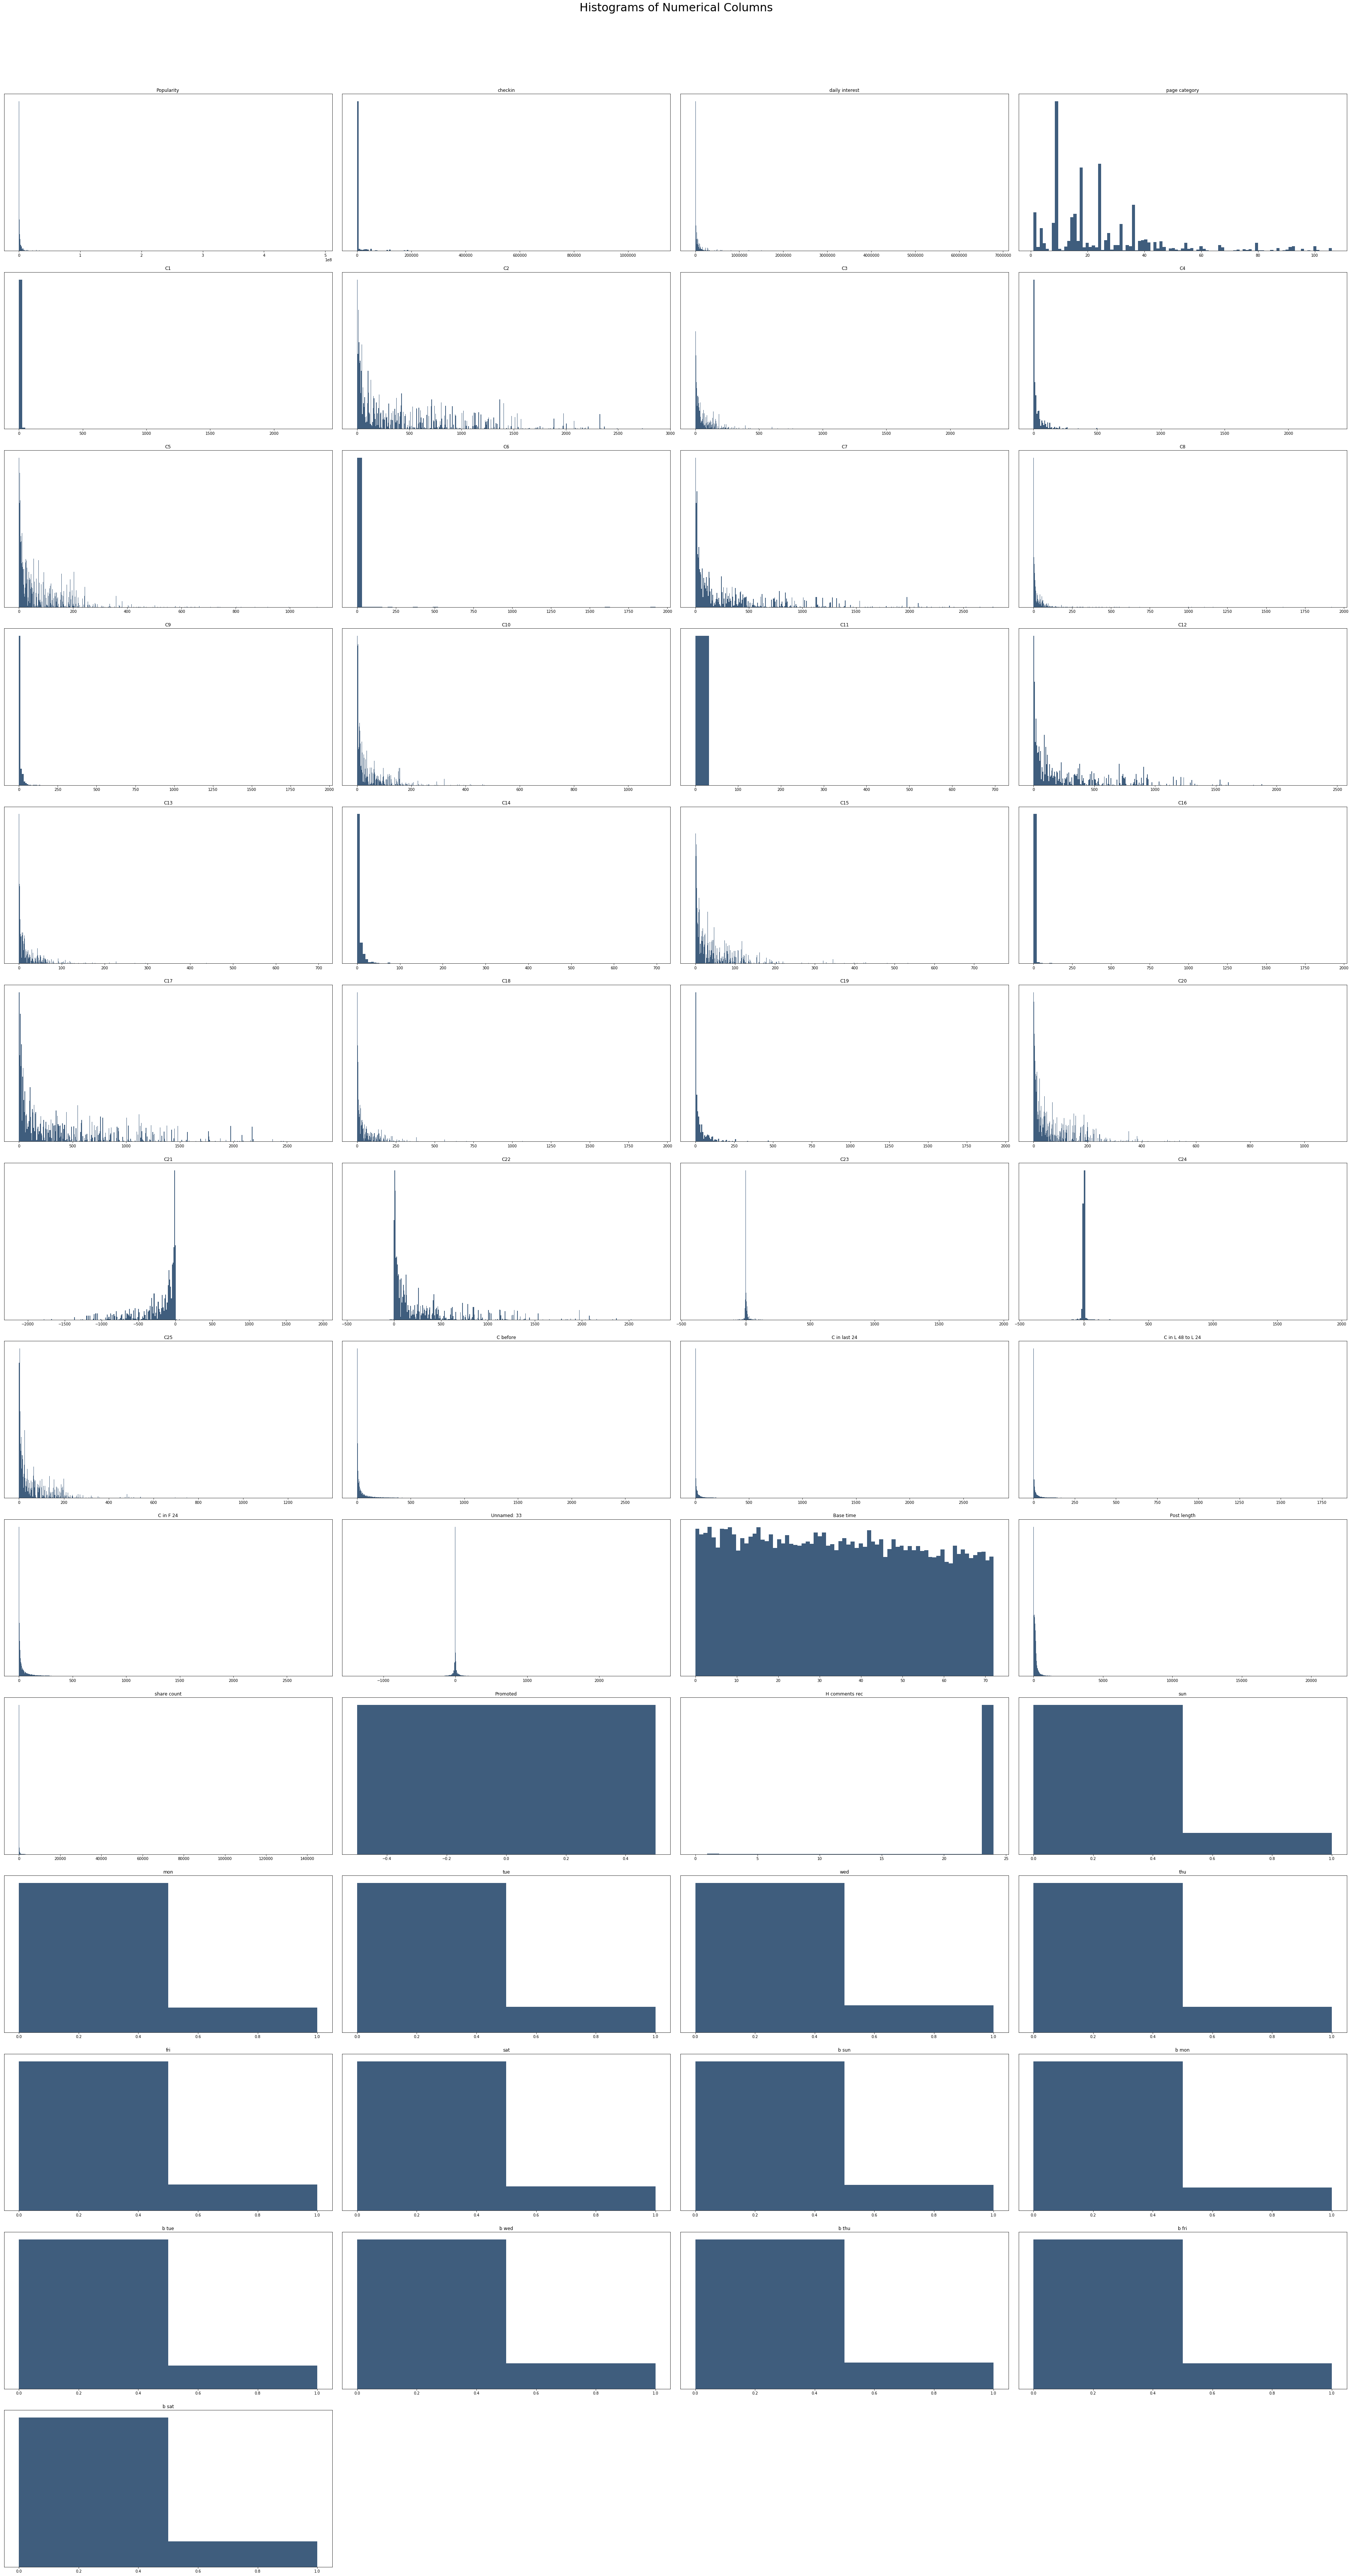

In [12]:
## Histograms
dataset2 = dataset.drop(columns = ['comments'])
fig = plt.figure(figsize=(50, 100))
plt.suptitle('Histograms of Numerical Columns', fontsize=30)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(14, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Correlation Matrix

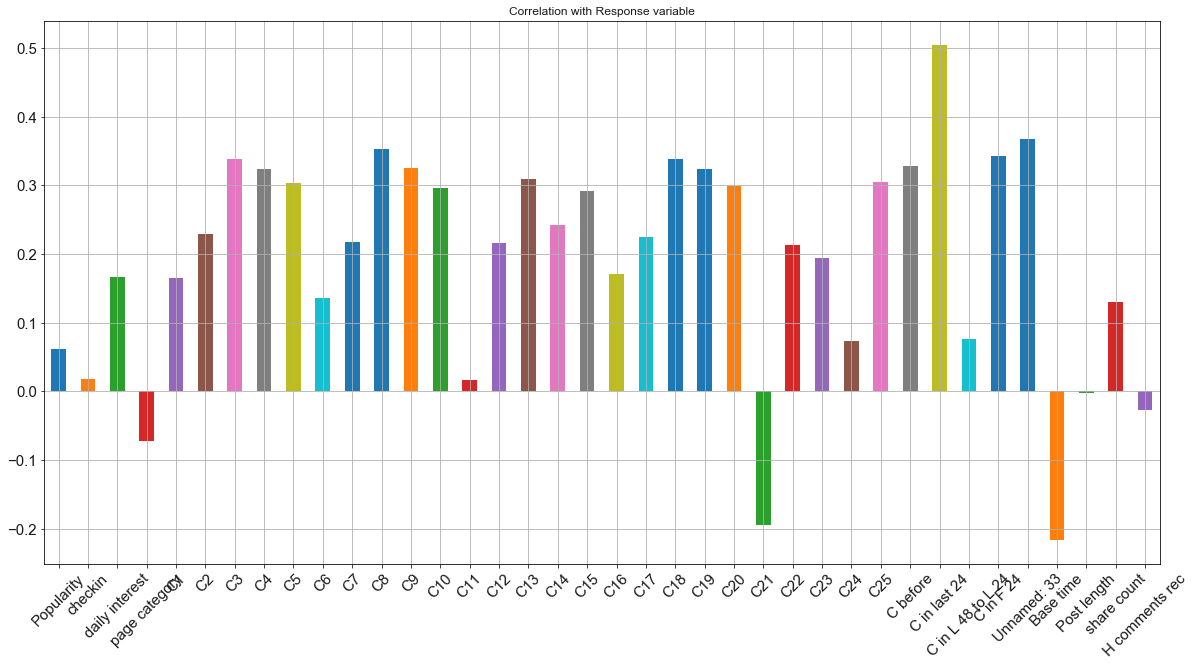

In [13]:
## Correlation with Response Variable
dataset2.drop(columns = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'b sun', 'b mon',
       'b tue', 'b wed', 'b thu', 'b fri', 'b sat', 'Promoted']
    ).corrwith(dataset.comments).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

## Correlation Matrix
sn.set(style="white")

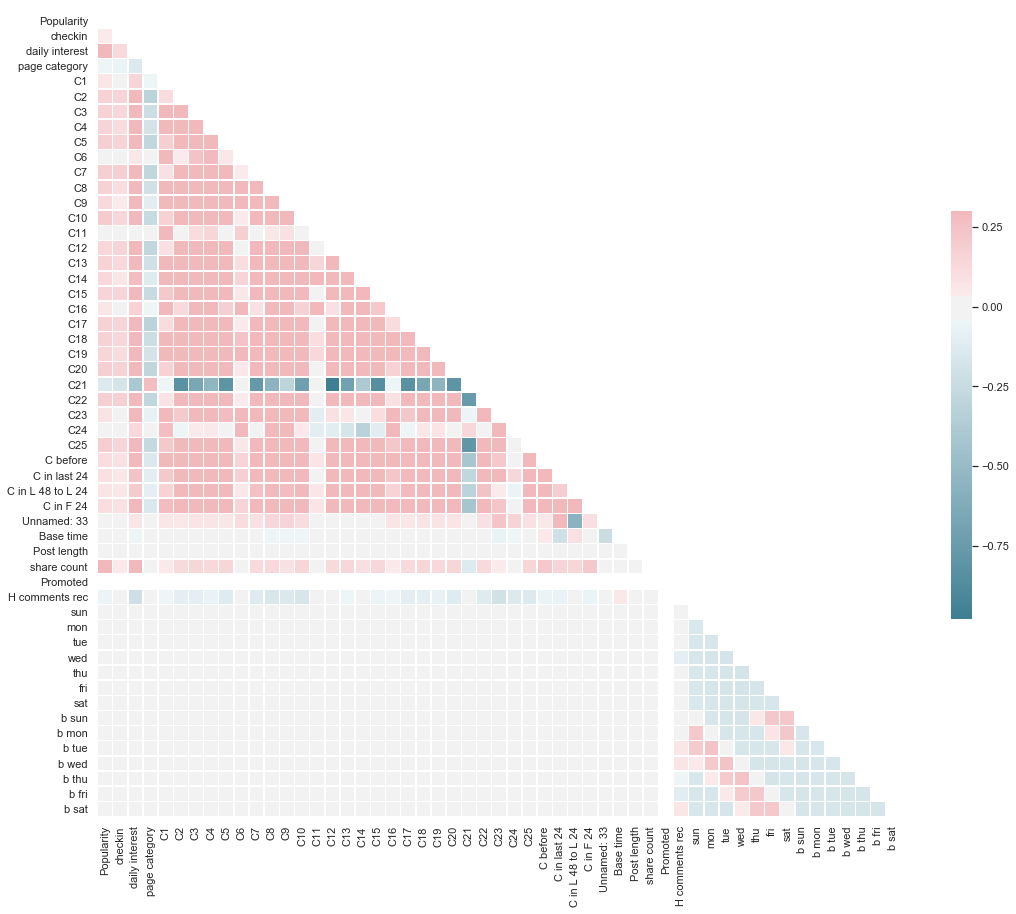

In [15]:
# Compute the correlation matrix
corr = dataset.drop(columns = ['comments']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['C21', 'Promoted'])

In [7]:
dataset['comments'] = np.where(dataset['comments']==0,0,1) #converting into binary classification
dataset = dataset.drop(columns = ['mon', 'b mon'])
dataset.head(5)

,Popularity,checkin,daily interest,page category,C1,C2,C3,C4,C5,C6,...,thu,fri,sat,b sun,b tue,b wed,b thu,b fri,b sat,comments
0,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,634995.0,0.0,463.0,1.0,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'comments'), dataset['comments'],
                                                    test_size = 0.3,
                                                    random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [9]:
# Balancing the Training Set
y_train.value_counts()

0    11203
1     9351
Name: comments, dtype: int64

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_val2 = pd.DataFrame(sc_X.transform(X_val))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_val2.columns = X_val.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_val2.index = X_val.index.values
X_train = X_train2
X_test = X_test2
X_val = X_val2

In [11]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# ANN

In [12]:
# Importing the Keras libraries and packages
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
print(X_train.shape)
print(y_train.shape)

(20554, 49)
(20554,)


In [35]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu', input_dim = 49))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20)

Epoch 1/20
20554/20554 [==============================] - 9s 453us/step - loss: 0.4377 - acc: 0.7990
Epoch 2/20
20554/20554 [==============================] - 9s 438us/step - loss: 0.3999 - acc: 0.8200
Epoch 3/20
20554/20554 [==============================] - ETA: 0s - loss: 0.3939 - acc: 0.822 - 8s 373us/step - loss: 0.3939 - acc: 0.8227
Epoch 4/20
20554/20554 [==============================] - 8s 398us/step - loss: 0.3890 - acc: 0.8287
Epoch 5/20
20554/20554 [==============================] - 8s 397us/step - loss: 0.3862 - acc: 0.8299
Epoch 6/20
20554/20554 [==============================] - 8s 396us/step - loss: 0.3831 - acc: 0.8306
Epoch 7/20
20554/20554 [==============================] - 8s 396us/step - loss: 0.3819 - acc: 0.8317
Epoch 8/20
20554/20554 [==============================] - 8s 398us/step - loss: 0.3799 - acc: 0.8317
Epoch 9/20
20554/20554 [==============================] - 8s 406us/step - loss: 0.3788 - acc: 0.8322
Epoch 10/20
20554/20554 [============================

In [15]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [37]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 84.2%
Test accuracy = 82.02%


## Different Number of Hidden Layers

In [28]:

accuracy_validation = [None]*10
accuracy_train = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu', input_dim = 49))
    i=0
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    print(NoOfHiddenLayers)
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 5)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    accuracy_train[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)

0
Epoch 1/5
20554/20554 [==============================] - 18s 870us/step - loss: 0.4401 - acc: 0.7966
Epoch 2/5
20554/20554 [==============================] - 7s 363us/step - loss: 0.4022 - acc: 0.8198
Epoch 3/5
20554/20554 [==============================] - 9s 431us/step - loss: 0.3951 - acc: 0.8244
Epoch 4/5
20554/20554 [==============================] - 12s 607us/step - loss: 0.3907 - acc: 0.8246
Epoch 5/5
20554/20554 [==============================] - 13s 623us/step - loss: 0.3879 - acc: 0.8279
1
Epoch 1/5
20554/20554 [==============================] - 19s 907us/step - loss: 0.4331 - acc: 0.8033
Epoch 2/5
20554/20554 [==============================] - 9s 433us/step - loss: 0.4027 - acc: 0.8203
Epoch 3/5
20554/20554 [==============================] - 7s 355us/step - loss: 0.3960 - acc: 0.8260
Epoch 4/5
20554/20554 [==============================] - 13s 633us/step - loss: 0.3909 - acc: 0.8255
Epoch 5/5
20554/20554 [==============================] - 12s 599us/step - loss: 0.3865 - ac

Text(0,0.5,'Accuracy on Validation Set')

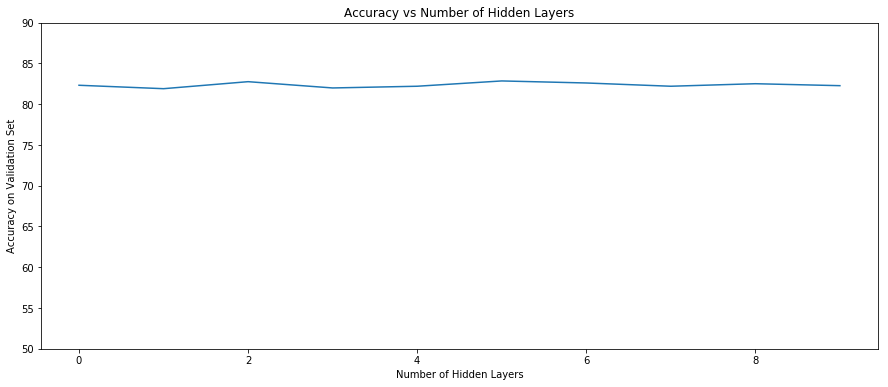

In [29]:
plt.figure(figsize=(15,6))
plt.ylim([50,90])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")


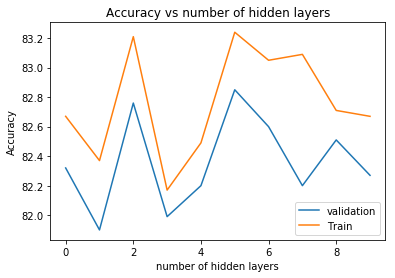

In [30]:
# Generate plot 
plt.plot(range(0,10), accuracy_validation, label = 'validation') 
plt.plot(range(0,10), accuracy_train, label = 'Train') 
  
plt.legend()
plt.title('Accuracy vs number of hidden layers')
plt.xlabel('number of hidden layers') 
plt.ylabel('Accuracy') 
plt.show()

## Number of Nodes vs Accuracy

In [20]:
accuracy_validation = [None]*10
accuracy_train = [None]*10
count = 0
for NoOfNodes in range(30,40):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 49))
    
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    print(NoOfNodes)
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 2)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    accuracy_train[count]=np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)
    count+=1

30
Epoch 1/2
20554/20554 [==============================] - 15s 712us/step - loss: 0.4368 - acc: 0.7996
Epoch 2/2
20554/20554 [==============================] - 10s 490us/step - loss: 0.4009 - acc: 0.8197
31
Epoch 1/2
20554/20554 [==============================] - 15s 711us/step - loss: 0.4354 - acc: 0.8027
Epoch 2/2
20554/20554 [==============================] - 11s 516us/step - loss: 0.4006 - acc: 0.8203
32
Epoch 1/2
20554/20554 [==============================] - 15s 716us/step - loss: 0.4336 - acc: 0.8004
Epoch 2/2
20554/20554 [==============================] - 10s 498us/step - loss: 0.4004 - acc: 0.8220
33
Epoch 1/2
20554/20554 [==============================] - 15s 741us/step - loss: 0.4377 - acc: 0.8004
Epoch 2/2
20554/20554 [==============================] - 11s 554us/step - loss: 0.4023 - acc: 0.8205
34
Epoch 1/2
20554/20554 [==============================] - 15s 708us/step - loss: 0.4356 - acc: 0.7996
Epoch 2/2
20554/20554 [==============================] - 11s 533us/step - lo

Text(0,0.5,'Accuracy on Validation Set')

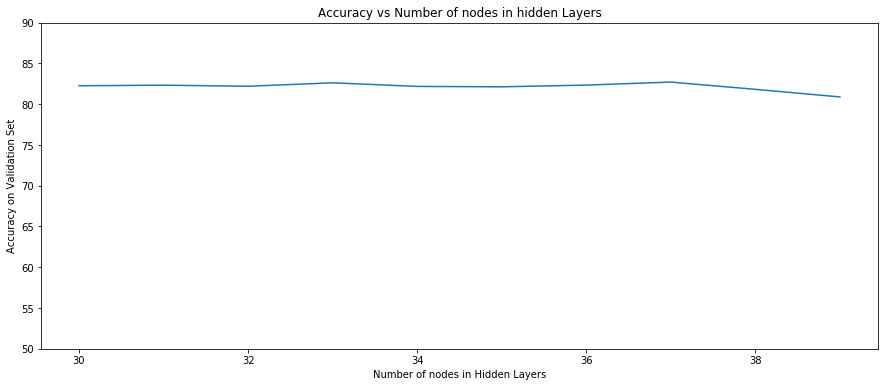

In [22]:
plt.figure(figsize=(15,6))
plt.ylim([50,90])
plt.plot(range(30,40),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

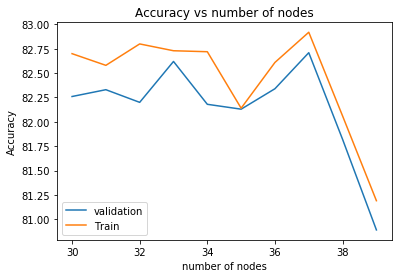

In [23]:
# Generate plot 
plt.plot(range(30,40), accuracy_validation, label = 'validation') 
plt.plot(range(30,40), accuracy_train, label = 'Train') 
  
plt.legend()
plt.title('Accuracy vs number of nodes')
plt.xlabel('number of nodes') 
plt.ylabel('Accuracy') 
plt.show()

## Different activation function

In [50]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu', input_dim = 49))
    
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    print(activationFunc[activation_Func])
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

relu
Epoch 1/4
20554/20554 [==============================] - 24s 1ms/step - loss: 0.5770 - acc: 0.6855
Epoch 2/4
20554/20554 [==============================] - 14s 673us/step - loss: 0.4980 - acc: 0.6996
Epoch 3/4
20554/20554 [==============================] - 14s 663us/step - loss: 0.4943 - acc: 0.7011
Epoch 4/4
20554/20554 [==============================] - 14s 669us/step - loss: 0.4965 - acc: 0.6903
sigmoid
Epoch 1/4
20554/20554 [==============================] - 25s 1ms/step - loss: 0.4371 - acc: 0.7998
Epoch 2/4
20554/20554 [==============================] - 17s 819us/step - loss: 0.4018 - acc: 0.8195
Epoch 3/4
20554/20554 [==============================] - 22s 1ms/step - loss: 0.3957 - acc: 0.8266: 0s - loss: 0.3957 - 
Epoch 4/4
20554/20554 [==============================] - 14s 695us/step - loss: 0.3902 - acc: 0.8263
tanh
Epoch 1/4
20554/20554 [==============================] - 23s 1ms/step - loss: 0.4869 - acc: 0.7817
Epoch 2/4
20554/20554 [==============================] - 12

Text(0,0.5,'Accuracy on Validation Set')

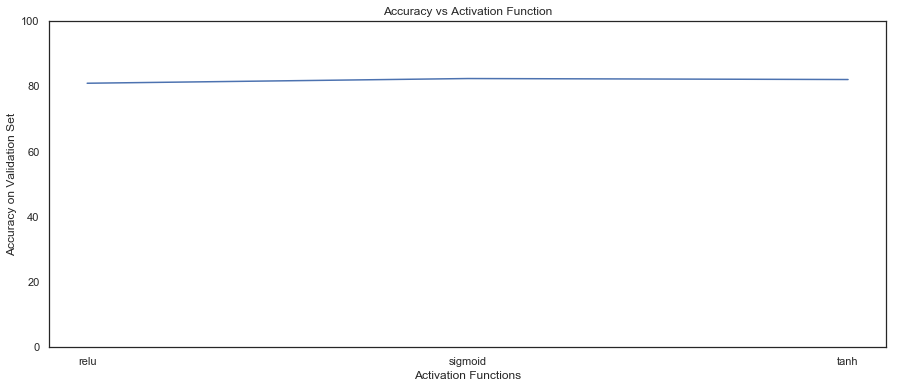

In [51]:
plt.figure(figsize=(15,6))
plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")

## Different Batch size

In [ ]:
accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu', input_dim = 49))
    classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    print(batchSize)
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, batch_size = batchSize, nb_epoch = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

5
Epoch 1/3
20554/20554 [==============================] - 63s 3ms/step - loss: 0.4301 - acc: 0.8051
Epoch 2/3
20554/20554 [==============================] - 49s 2ms/step - loss: 0.4022 - acc: 0.8219
Epoch 3/3
20554/20554 [==============================] - 41s 2ms/step - loss: 0.3966 - acc: 0.8236
6
Epoch 1/3
20554/20554 [==============================] - 35s 2ms/step - loss: 0.3983 - acc: 0.8236
7
Epoch 1/3
20554/20554 [==============================] - 44s 2ms/step - loss: 0.4312 - acc: 0.8039
Epoch 2/3
20554/20554 [==============================] - 30s 1ms/step - loss: 0.4016 - acc: 0.8193
Epoch 3/3
20554/20554 [==============================] - 28s 1ms/step - loss: 0.3963 - acc: 0.8230
8
Epoch 1/3
20554/20554 [==============================] - 52s 3ms/step - loss: 0.4318 - acc: 0.8048
Epoch 2/3
20554/20554 [==============================] - 23s 1ms/step - loss: 0.4021 - acc: 0.8200
Epoch 3/3
20554/20554 [==============================] - 24s 1ms/step - loss: 0.3950 - acc: 0.8243
9


Text(0,0.5,'Accuracy on Validation Set')

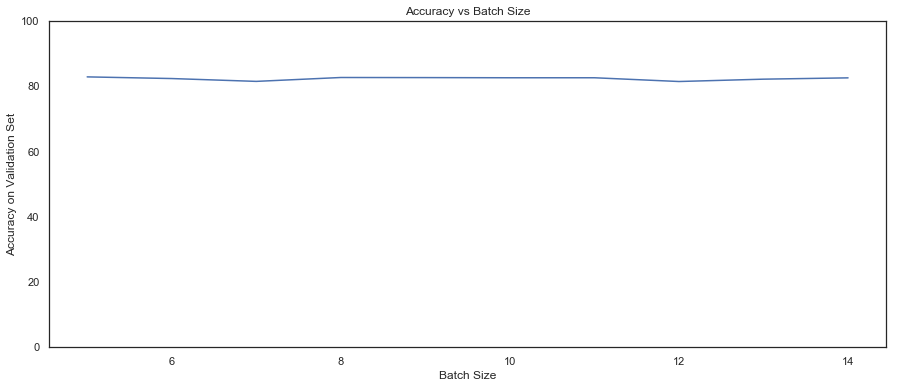

In [61]:
plt.figure(figsize=(15,6))
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

## Final NN after hyper parameter tuning

In [35]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu', input_dim = 49))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 50)

Epoch 1/50
20554/20554 [==============================] - 28s 1ms/step - loss: 0.4332 - acc: 0.8018
Epoch 2/50
20554/20554 [==============================] - 17s 837us/step - loss: 0.4005 - acc: 0.8216
Epoch 3/50
20554/20554 [==============================] - 14s 683us/step - loss: 0.3937 - acc: 0.8249
Epoch 4/50
20554/20554 [==============================] - 14s 672us/step - loss: 0.3879 - acc: 0.8242
Epoch 5/50
20554/20554 [==============================] - 14s 695us/step - loss: 0.3853 - acc: 0.8272
Epoch 6/50
20554/20554 [==============================] - 14s 692us/step - loss: 0.3830 - acc: 0.8287
Epoch 7/50
20554/20554 [==============================] - 15s 746us/step - loss: 0.3805 - acc: 0.8302
Epoch 8/50
20554/20554 [==============================] - 15s 710us/step - loss: 0.3785 - acc: 0.8298
Epoch 9/50
20554/20554 [==============================] - 14s 691us/step - loss: 0.3772 - acc: 0.8315
Epoch 10/50
20554/20554 [==============================] - 15s 706us/step - loss: 0.

In [ ]:

print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)))

# K-NN

In [31]:
train_score = []
test_score = []
n_neigh = []

In [33]:

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)  
    knn.fit(X_train, y_train) 
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    train_score.append(metrics.accuracy_score(y_train,pred_train))
    test_score.append(metrics.accuracy_score(y_test,pred_test))
    n_neigh.append(i)

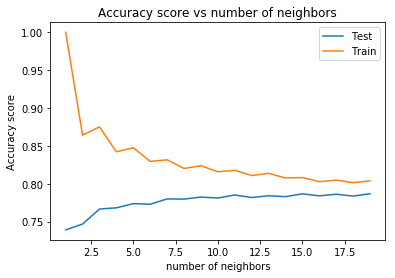

In [34]:
# Generate plot 
plt.plot(n_neigh, test_score, label = 'Test') 
plt.plot(n_neigh, train_score, label = 'Train') 
  
plt.legend()
plt.title('Accuracy score vs number of neighbors')
plt.xlabel('number of neighbors') 
plt.ylabel('Accuracy score') 
plt.show()

Train accuracy 0.7981901333073854
Test accuracy 0.7837902264600715
Train Confusion matrix
Confusion matrix, without normalization
[[9969 1234]
 [2914 6437]]


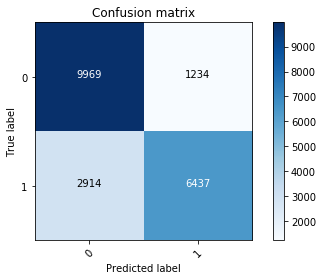

Test confusion matrix
Confusion matrix, without normalization
[[5996  862]
 [1859 3868]]


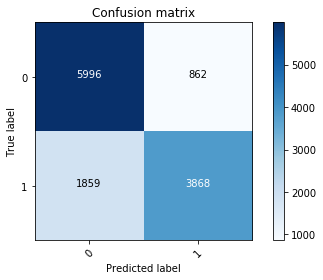

Train classification report              precision    recall  f1-score   support

          0       0.77      0.89      0.83     11203
          1       0.84      0.69      0.76      9351

avg / total       0.80      0.80      0.80     20554

Test classification report              precision    recall  f1-score   support

          0       0.76      0.87      0.82      6858
          1       0.82      0.68      0.74      5727

avg / total       0.79      0.78      0.78     12585



In [36]:
knn = KNeighborsClassifier(n_neighbors=20)  
knn.fit(X_train, y_train) 
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)
print('Train accuracy', metrics.accuracy_score(y_train,pred_train))
print('Test accuracy', metrics.accuracy_score(y_test,pred_test))
print('Train Confusion matrix')
plot_confusion_matrix(confusion_matrix(y_train,pred_train.round()), classes=[0,1])
plt.show()
print('Test confusion matrix')
plot_confusion_matrix(confusion_matrix(y_test,pred_test.round()), classes=[0,1])
plt.show()
print('Train classification report', classification_report(y_train,pred_train))
print('Test classification report', classification_report(y_test,pred_test))


In [45]:
train_score = []
test_score = []
met = ['euclidean','manhattan', 'minkowski', 'hamming']
for i in range(len(met)):
    knn = KNeighborsClassifier(n_neighbors=20, metric = met[i])  
    knn.fit(X_train, y_train) 
    pred_test = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    train_score.append(metrics.accuracy_score(y_train,pred_train))
    test_score.append(metrics.accuracy_score(y_test,pred_test))

NameError: name 'metric' is not defined

In [40]:
# Generate plot 
plt.plot(met, test_score, label = 'Test') 
plt.plot(met, train_score, label = 'Train') 
  
plt.legend()
plt.title('Accuracy score vs metrics')
plt.xlabel('metrics') 
plt.ylabel('Accuracy score') 
plt.show()

['euclidean', 'manhattan', 'minkowski', 'hamming']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric='minkowski')  
knn.fit(X_train, y_train) 
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)
print('Train accuracy', metrics.accuracy_score(y_train,pred_train))
print('Test accuracy', metrics.accuracy_score(y_test,pred_test))
print('Train Confusion matrix')
plot_confusion_matrix(confusion_matrix(y_train,pred_train.round()), classes=[0,1])
plt.show()
print('Test confusion matrix')
plot_confusion_matrix(confusion_matrix(y_test,pred_test.round()), classes=[0,1])
plt.show()
print('Train classification report', classification_report(y_train,pred_train))
print('Test classification report', classification_report(y_test,pred_test))

# Cross Validation

In [ ]:

from sklearn.model_selection import cross_val_score

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 20, metric ='minkowski',p=2)

r, c = y_train.shape

accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train.reshape(r,),cv=10)

In [ ]:
accuracies.mean()

In [ ]:
accuracies.std()